In [103]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
from sklearn import preprocessing
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [35]:
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [36]:
df = pd.read_csv("../data/ap-ds-join/combined-ap-ds-1802-1812.csv")

In [37]:
df.head()

,Unnamed: 0,Unnamed: 0.1,run_date,version,disable_all_env,disable_sys_env,disable_proc_env,disable_mpi_env,disable_hpm_env,output_local_env,...,TOTAL_CP_EXTENT_WRITE_10K_100K,TOTAL_CP_SIZE_WRITE_100K_1M,TOTAL_CP_SIZE_READ_AGG_1G_PLUS,TOTAL_CP_COMBINER_STRUCT_INTEGER,TOTAL_CP_SIZE_WRITE_AGG_1K_10K,TOTAL_CP_SIZE_READ_AGG_100K_1M,TOTAL_CP_EXTENT_WRITE_0_100,frac_io,frac_mpi,frac_comp
0,0,32473,2018-1-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.000006,0.757950,0.242044
1,1,32474,2018-1-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.000007,0.684473,0.315520
2,2,32475,2018-1-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.000010,0.661605,0.338385
3,3,33090,2018-1-3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.000050,0.618352,0.381597
4,4,39694,2018-1-20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.000011,0.536794,0.463194


In [38]:
plot_df = pd.DataFrame(
    dict(
        r=[np.mean(df.frac_io), np.mean(df.frac_mpi), np.mean(df.frac_comp)],
        theta=[
            "Fractional IO Time",
            "Fractional MPI Time",
            "Fractional Computation Time",
        ],
    )
)

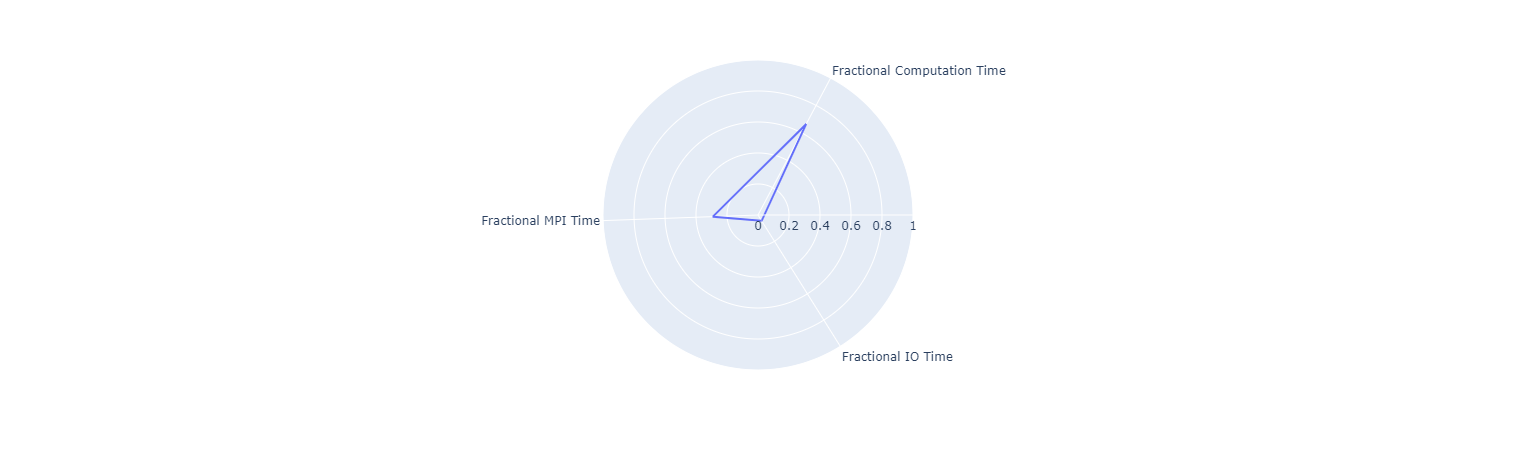

In [39]:
fig = px.line_polar(plot_df, r="r", theta="theta", line_close=True, range_r=[0, 1])
fig

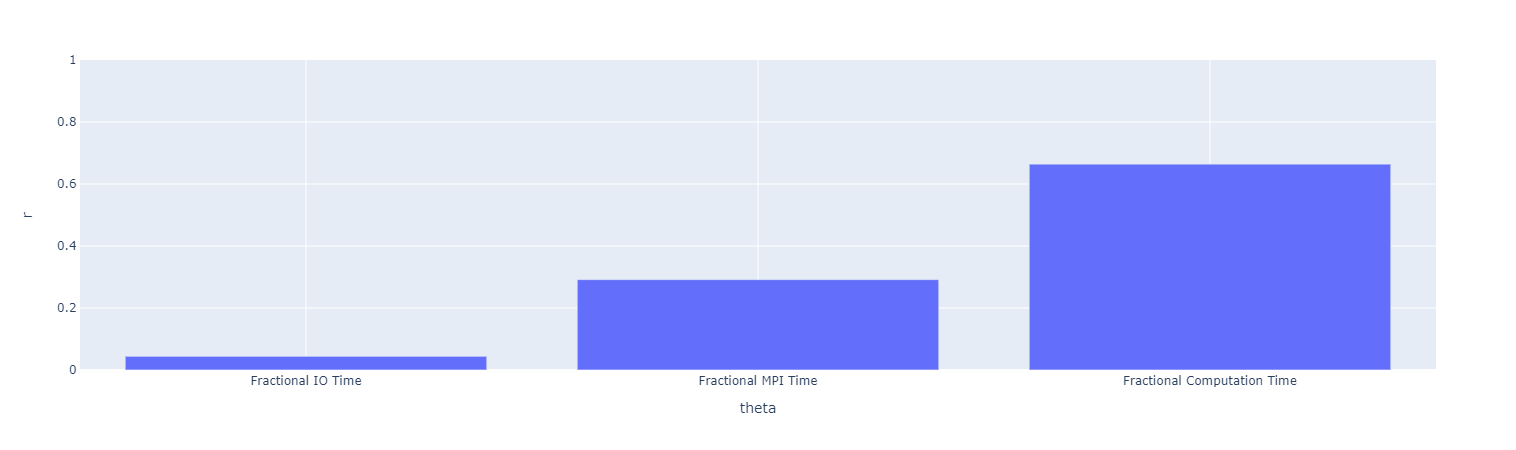

In [200]:
fig = px.bar(plot_df, x="theta", y="r", range_y=[0,1])
fig

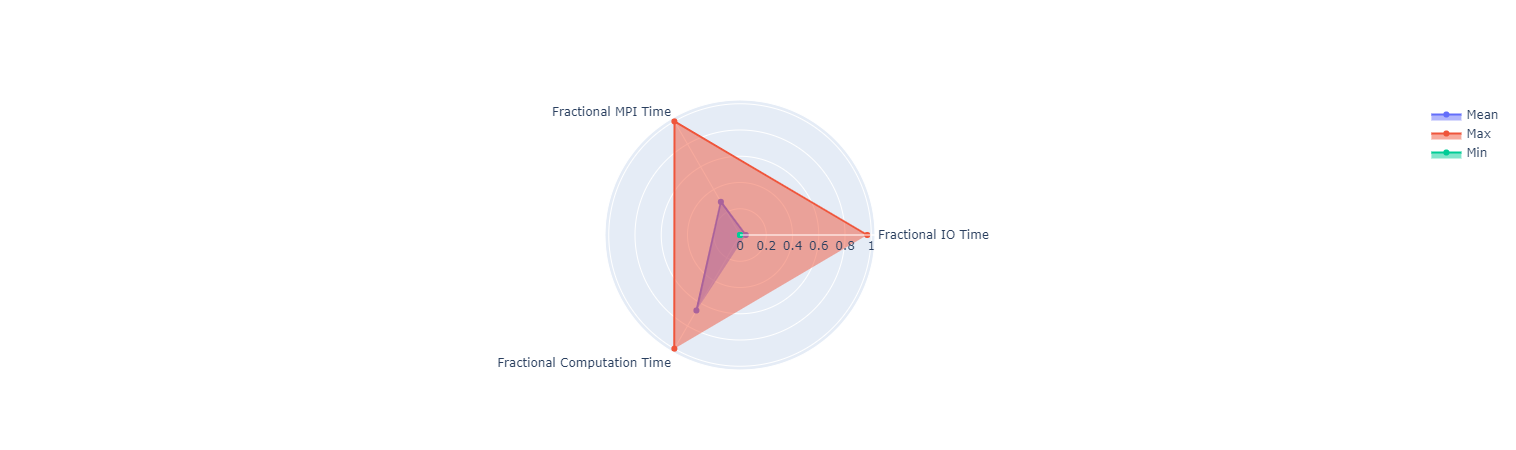

In [40]:
theta = ["Fractional IO Time", "Fractional MPI Time", "Fractional Computation Time"]

fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        r=[np.mean(df.frac_io), np.mean(df.frac_mpi), np.mean(df.frac_comp)],
        theta=theta,
        fill="toself",
        name="Mean",
    )
)

fig.add_trace(
    go.Scatterpolar(
        r=[max(df.frac_io), max(df.frac_mpi), max(df.frac_comp)],
        theta=theta,
        fill="toself",
        name="Max",
    )
)

fig.add_trace(
    go.Scatterpolar(
        r=[min(df.frac_io), min(df.frac_mpi), min(df.frac_comp)],
        theta=theta,
        fill="toself",
        name="Min",
    )
)

fig.update_layout(polar=dict(radialaxis=dict(visible=True),), showlegend=True)

fig.show()

In [41]:
mira_df = pd.read_csv("../data/composed/mira_top_10.csv")

/home/luckierdodge/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (877) have mixed types.Specify dtype option on import or set low_memory=False.



In [168]:
mira_df.describe()

,disable_mpi_env,output_local_env,output_local_env_val,disable_mpi,output_local,zero_startCycle,zero_stopCycle,zero_elapsedCycles,zero_elapsedTime,zero_csJobId,...,IS_CONSECUTIVE_ONLY,IS_SINGLE_ONLY,IS_NO_TASKS,IS_OTHER,OVERBURN_CORE_HOURS,IS_OVERBURN,gflops,gops,ram_store_bpop,ram_fetch_bpop
count,15139.0,15139.000000,15139.000000,15139.0,15139.000000,1.513900e+04,1.513900e+04,1.513900e+04,15139.000000,1.513900e+04,...,15139.000000,15139.000000,15139.0,15139.000000,1.513900e+04,15139.000000,1.513900e+04,15139.000000,15139.000000,15139.000000
mean,0.0,0.006672,0.006672,0.0,0.006672,2.837649e+11,1.654274e+13,1.625897e+13,10161.858902,2.490736e+06,...,0.020675,0.213819,0.0,0.582403,2.286634e+04,0.016646,1.787068e+00,13.416076,69.028565,169.480302
std,0.0,0.081409,0.081409,0.0,0.081409,3.037378e+12,1.998278e+13,1.986399e+13,12414.991959,3.511632e+05,...,0.142299,0.410014,0.0,0.493179,2.576439e+05,0.127944,1.196645e+00,3.588057,118.350803,245.240895
min,0.0,0.000000,0.000000,0.0,0.000000,2.339569e+10,2.979701e+10,8.565640e+05,0.000535,1.750867e+06,...,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,1.507987e-08,0.142082,0.001570,0.000961
25%,0.0,0.000000,0.000000,0.0,0.000000,6.868798e+10,2.930183e+12,2.705869e+12,1691.168297,2.101562e+06,...,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,7.221430e-01,11.266121,8.263018,11.033407
50%,0.0,0.000000,0.000000,0.0,0.000000,9.687081e+10,1.174074e+13,1.143325e+13,7145.779427,2.642876e+06,...,0.000000,0.000000,0.0,1.000000,0.000000e+00,0.000000,2.037267e+00,14.670814,40.577485,70.319898
75%,0.0,0.000000,0.000000,0.0,0.000000,1.147950e+11,1.931599e+13,1.915022e+13,11968.885925,2.767806e+06,...,0.000000,0.000000,0.0,1.000000,0.000000e+00,0.000000,2.805426e+00,16.328710,108.294468,301.242898
max,0.0,1.000000,1.000000,0.0,1.000000,6.681614e+13,1.377427e+14,1.375531e+14,85970.668079,3.180748e+06,...,1.000000,1.000000,0.0,1.000000,1.039882e+07,1.000000,1.008046e+01,23.240252,2135.244092,3405.635212


In [187]:
# feature_labels = ['gflops', 'gops', 'ram_store_bpop', 'ram_fetch_bpop', 'av_stdMpiTime', 'RUNTIME_SECONDS', 'WALLTIME_SECONDS'] # Specify the features you want
feature_labels = ['gflops', 'gops', 'ram_store_bpop', 'ram_fetch_bpop', 'av_stdMpiTime'] # Specify the features you want
feature_names = ['GFLOPS', 'GOPS', 'RAM Store Bytes/OP', 'RAM Fetch Bytes/OP', 'Average MPI Time', 'Runtime / Walltime', 'GFLOPS']

# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(mira_df[feature_labels])
df_normalized = pd.DataFrame(np_scaled, columns = feature_labels)

# Average
df_normalized['zero_execName'] = mira_df['zero_execName']
df_normalized['runtime_ratio'] = mira_df['RUNTIME_SECONDS'] / mira_df['WALLTIME_SECONDS']
df_normalized = df_normalized[['gflops', 'gops', 'ram_store_bpop', 'ram_fetch_bpop', 'av_stdMpiTime', 'runtime_ratio', 'gflops', 'zero_execName']]
df_mean = df_normalized.groupby(['zero_execName']).mean()
df_min = df_normalized.groupby(['zero_execName']).min()
df_max = df_normalized.groupby(['zero_execName']).max()

In [188]:
df_mean

,gflops,gops,ram_store_bpop,ram_fetch_bpop,av_stdMpiTime,runtime_ratio,gflops
zero_execName,,,,,,,
bigdft,0.236083,0.431085,0.000360,0.000265,0.031235,0.641554,0.236083
cdp_if,0.023653,0.240350,0.002365,0.004851,0.127784,0.688524,0.023653
dump_tecplot_files,0.004516,0.327266,0.001142,0.000555,0.000694,0.903410,0.004516
lmp_bgq_xlomp,0.149689,0.458390,0.008075,0.011214,0.047684,0.413516,0.149689
lmp_mira_r200_Feb16_2016,0.068480,0.482691,0.014558,0.007673,0.230379,0.838920,0.068480
mpcugles,0.029784,0.307040,0.007064,0.022188,0.200047,0.812287,0.029784
nek5000,0.186688,0.643943,0.045255,0.072441,0.056562,0.617725,0.186688
test_solver.exe,0.000269,0.019408,0.000004,0.000009,0.000846,0.431207,0.000269
x.mc.12c-11_states-pn,0.327291,0.316499,0.000140,0.000118,0.026822,0.738773,0.327291


In [189]:
@interact(Executable1=df_mean.index, Executable2=df_mean.index, subplots=False)
def radar_chart_comparison(Executable1, Executable2, subplots):
    fig = make_subplots(1, 1, specs=[[{'type': 'polar'}]]) if not subplots else make_subplots(1, 2, specs=[[{'type': 'polar'}]*2])
    fig.add_trace(
        go.Scatterpolar(
#             r=np.concatenate((df_mean.loc[Executable1].values, [df_mean.loc[Executable1].values[0]])),
            r=df_mean.loc[Executable1].values,
            theta=feature_names,
            fill="toself",
            name=Executable1,
        ), 1, 1
    )
    fig.add_trace(
        go.Scatterpolar(
#             r=np.concatenate((df_mean.loc[Executable2].values, [df_mean.loc[Executable2].values[0]])),
            r=df_mean.loc[Executable2].values,
            theta=feature_names,
            fill="toself",
            name=Executable2,
        ), 1, 2 if subplots else 1
    )

    fig.update_layout(polar=dict(radialaxis=dict(visible=True),), showlegend=True)
    fig.show()

interactive(children=(Dropdown(description='Executable1', options=('bigdft', 'cdp_if', 'dump_tecplot_files', '…

In [190]:
@interact(Executable1=df_mean.index)
def radar_chart(Executable1):
    fig = go.Figure()
    fig.add_trace(
        go.Scatterpolar(
#             r=np.concatenate((df_mean.loc[Executable1].values, [df_mean.loc[Executable1].values[0]])),
            r=df_mean.loc[Executable1].values,
            theta=feature_names,
#   .ipynb_checkpoints/         fill="toself",
            name='Mean',
        )
    )
    fig.add_trace(
        go.Scatterpolar(
#             r=np.concatenate((df_min.loc[Executable1].values, [df_min.loc[Executable1].values[0]])),
            r=df_min.loc[Executable1].values,
            theta=feature_names,
#             fill="toself",
            name='Min',
        )
    )
    fig.add_trace(
        go.Scatterpolar(
#             r=np.concatenate((df_max.loc[Executable1].values, [df_max.loc[Executable1].values[0]])),
            r=df_max.loc[Executable1].values,
            theta=feature_names,
#             fill="toself",
            name='Max',
        )
    )

    fig.update_layout(polar=dict(radialaxis=dict(visible=True),), showlegend=True)
    fig.show()

interactive(children=(Dropdown(description='Executable1', options=('bigdft', 'cdp_if', 'dump_tecplot_files', '…

In [195]:
@interact(Executable1=df_mean.index)
def radar_chart(Executable1):
    fig = go.Figure()
    r = []
    theta = []
    for index, row in df_normalized[df_normalized.zero_execName == Executable1].iterrows():
        r = np.concatenate((r, row[0:7], [None]))
        theta = np.concatenate((theta, feature_names, [None]))
    fig.add_trace(
        go.Scatterpolar(
            r=r,
            theta=theta,
#             mode='lines+markers',
#             opacity=.5,
#             line_color="blue",
#             marker=dict(
#                 color="rgba(0, 100, 200, 1)",
#                 size=5,
# #                 symbol='x'
#             ),
            line=dict(
                color="rgba(0, 150, 0, .3)",
                width=1
            )
        )
    )

    fig.update_layout(polar=dict(radialaxis=dict(visible=True),), showlegend=False, height=750, width=750)
    fig.update_traces(connectgaps=False)
    fig.show()

interactive(children=(Dropdown(description='Executable1', options=('bigdft', 'cdp_if', 'dump_tecplot_files', '…